In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Aesthetic configuration for seaborn and matplotlib
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid', palette='rocket')

# Read Data

In [3]:
df = pd.read_csv('Student_Performance_Dataset.csv')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.shape

(649, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# Numeric Data Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


# Understanding the columns
school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [7]:
#Check null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Exploratory Data Analysis (EDA)

In [8]:
#Basic Analysis

In [9]:
df['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

In [10]:
df['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [11]:
df['famsize'].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [12]:
df['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [13]:
# correlation between Variables

<AxesSubplot:>

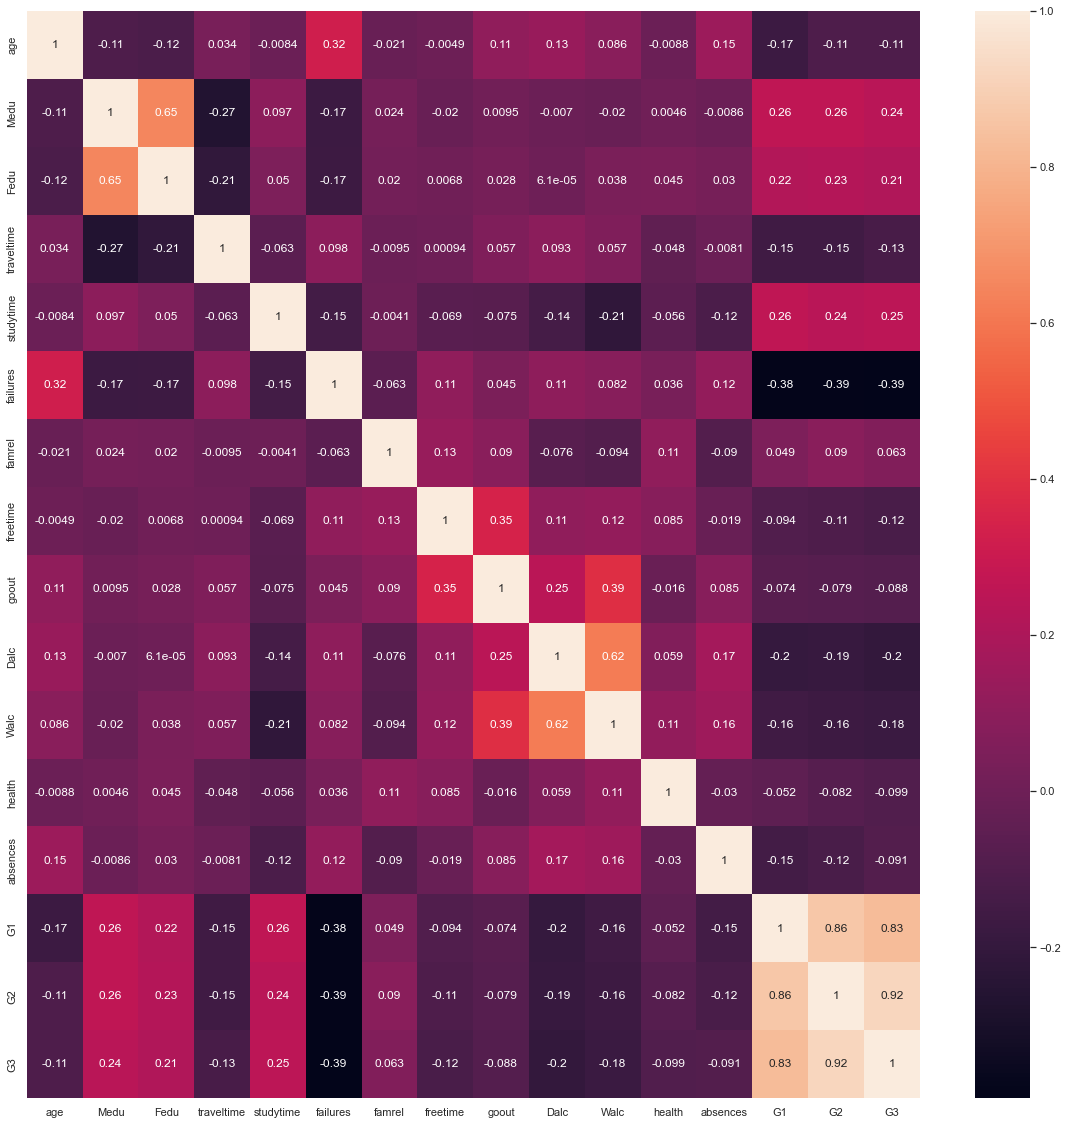

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

# Data Visualization

In [15]:
#Categorical data visualization

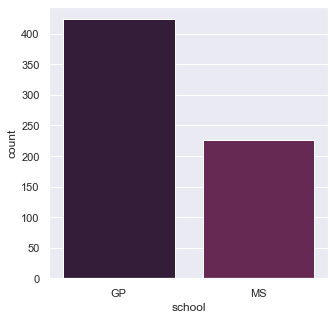

school 
 GP    423
MS    226
Name: school, dtype: int64


In [16]:
col_1=["school"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

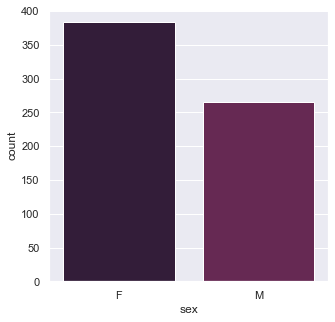

sex 
 F    383
M    266
Name: sex, dtype: int64


In [17]:
col_1=["sex"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

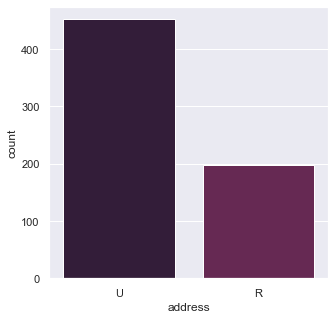

address 
 U    452
R    197
Name: address, dtype: int64


In [18]:
col_1=["address"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

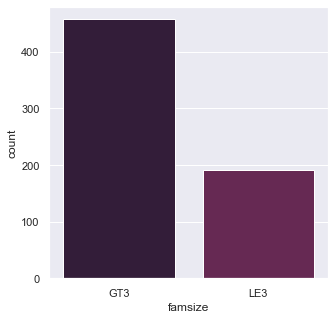

famsize 
 GT3    457
LE3    192
Name: famsize, dtype: int64


In [19]:
col_1=["famsize"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

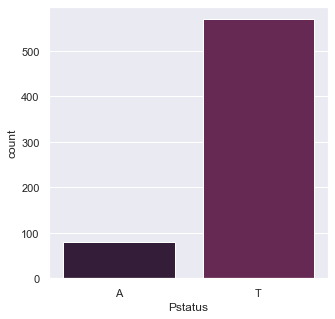

Pstatus 
 T    569
A     80
Name: Pstatus, dtype: int64


In [20]:
col_1=["Pstatus"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

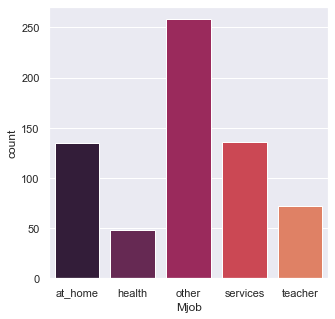

Mjob 
 other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64


In [21]:
col_1=["Mjob"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

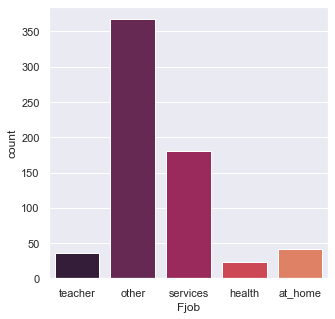

Fjob 
 other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64


In [22]:
col_1=["Fjob"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

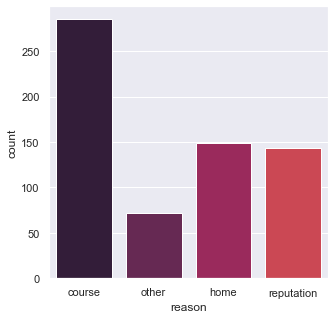

reason 
 course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64


In [23]:
col_1=["reason"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

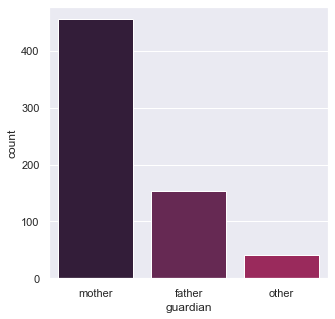

guardian 
 mother    455
father    153
other      41
Name: guardian, dtype: int64


In [24]:
col_1=[ "guardian"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

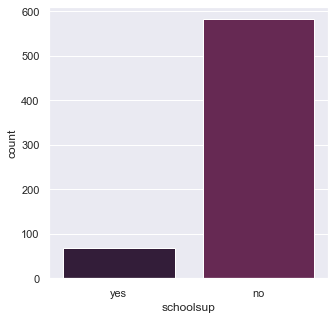

schoolsup 
 no     581
yes     68
Name: schoolsup, dtype: int64


In [25]:
col_1=["schoolsup"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

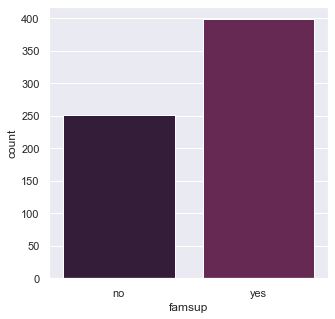

famsup 
 yes    398
no     251
Name: famsup, dtype: int64


In [26]:
col_1=["famsup"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

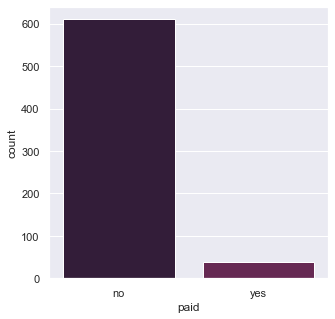

paid 
 no     610
yes     39
Name: paid, dtype: int64


In [27]:
col_1=[ "paid"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

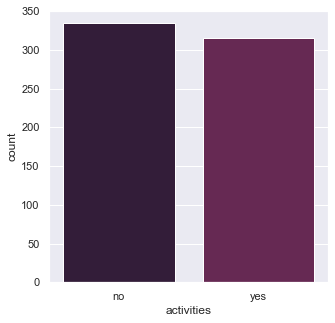

activities 
 no     334
yes    315
Name: activities, dtype: int64


In [28]:
col_1=["activities"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

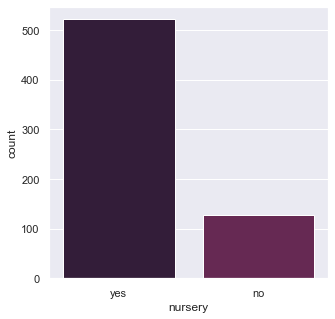

nursery 
 yes    521
no     128
Name: nursery, dtype: int64


In [29]:
col_1=["nursery"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

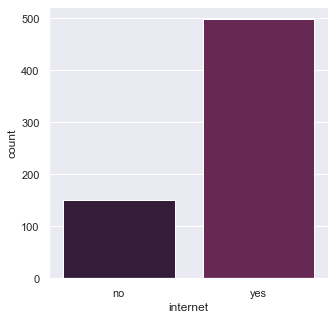

internet 
 yes    498
no     151
Name: internet, dtype: int64


In [30]:
col_1=["internet"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

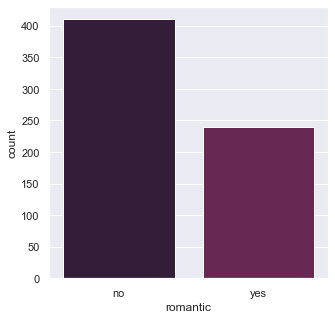

romantic 
 no     410
yes    239
Name: romantic, dtype: int64


In [31]:
col_1=[ "romantic"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

In [32]:
#Numeical data visualization

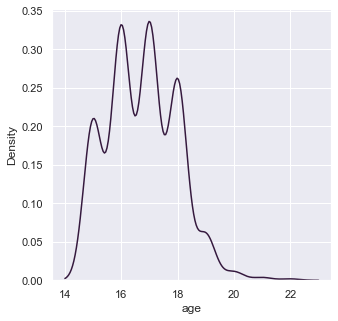

age 
 17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64


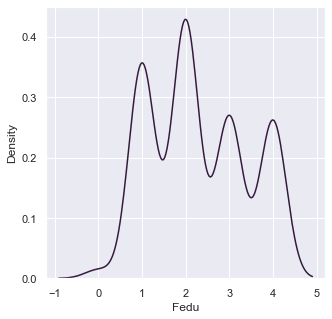

Fedu 
 2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64


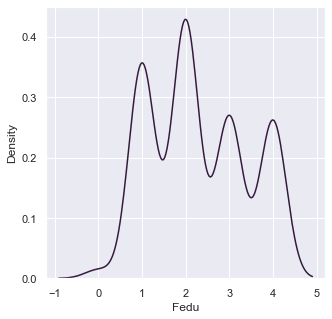

Fedu 
 2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64


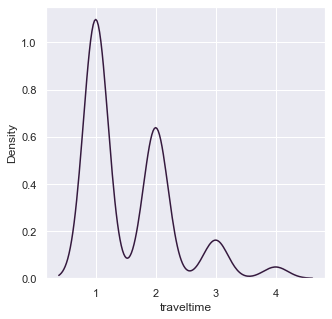

traveltime 
 1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64


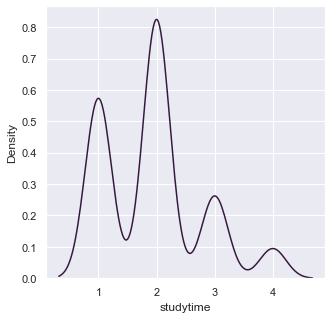

studytime 
 2    305
1    212
3     97
4     35
Name: studytime, dtype: int64


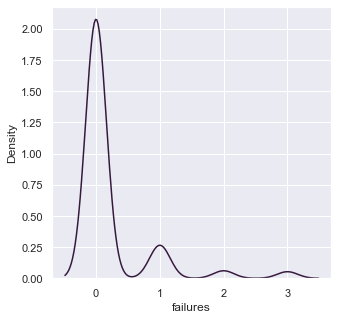

failures 
 0    549
1     70
2     16
3     14
Name: failures, dtype: int64


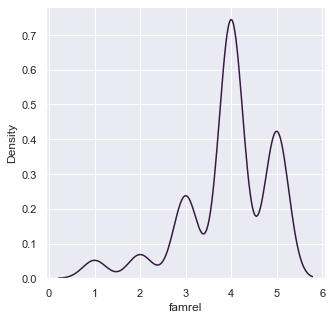

famrel 
 4    317
5    180
3    101
2     29
1     22
Name: famrel, dtype: int64


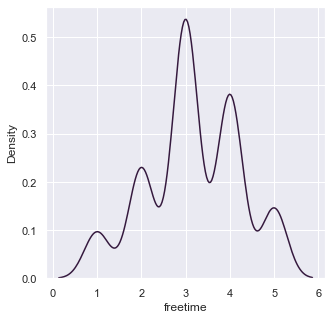

freetime 
 3    251
4    178
2    107
5     68
1     45
Name: freetime, dtype: int64


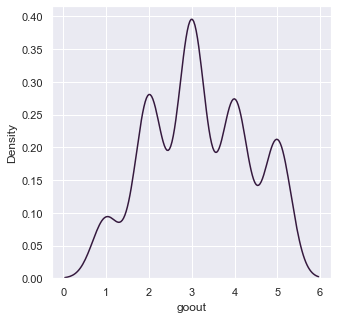

goout 
 3    205
2    145
4    141
5    110
1     48
Name: goout, dtype: int64


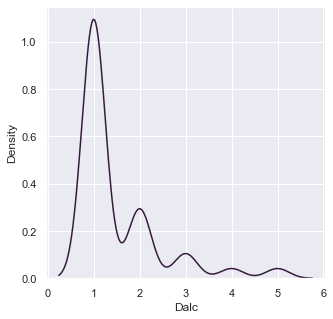

Dalc 
 1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64


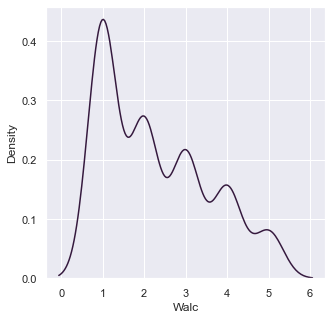

Walc 
 1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64


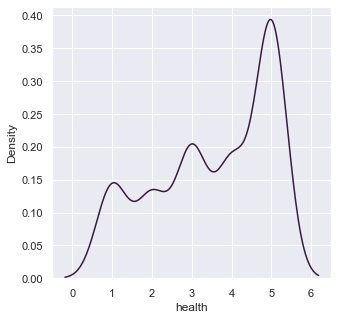

health 
 5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64


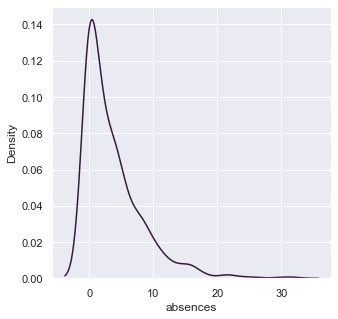

absences 
 0     244
2     110
4      93
6      49
8      42
10     21
1      12
12     12
5      12
16     10
14      8
9       7
3       7
11      5
18      3
7       3
21      2
15      2
22      2
30      1
26      1
24      1
13      1
32      1
Name: absences, dtype: int64


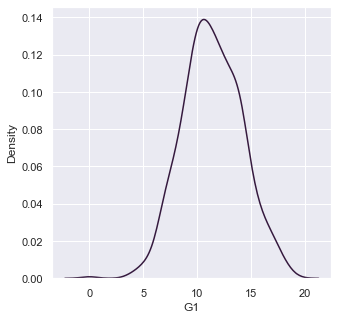

G1 
 10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: G1, dtype: int64


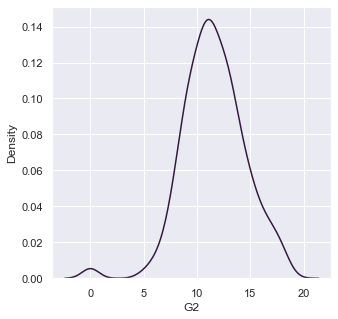

G2 
 11    103
12     86
10     83
13     80
9      72
14     54
8      40
15     38
16     25
17     20
7      16
18     14
6       7
0       7
5       3
19      1
Name: G2, dtype: int64


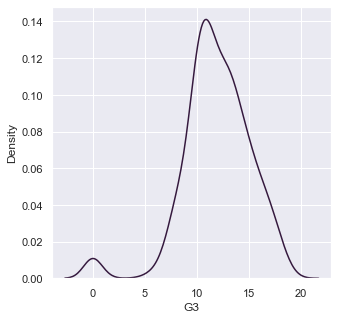

G3 
 11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64


In [33]:
col_2=["age", "Fedu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc" ,"health", "absences", "G1", "G2", "G3"]
def hist_plot(col_2):
        plt.figure(figsize=(5,5))
        sns.kdeplot(data=df, x=col_2)

        plt.show()
        print(col_2,"\n",df[col_2].value_counts())
# Print
for i in col_2:
        hist_plot(i)

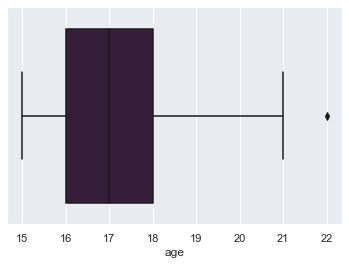

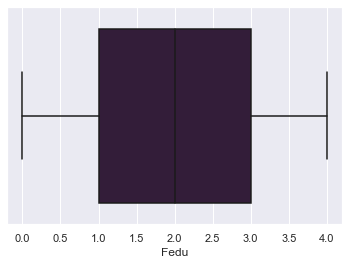

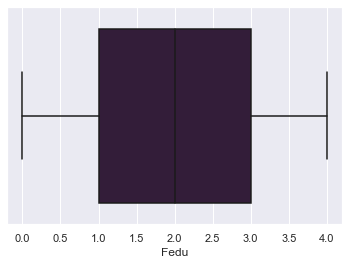

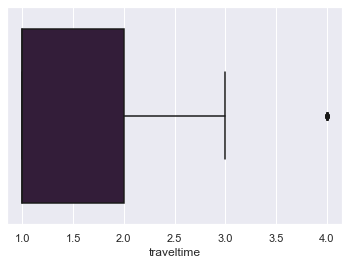

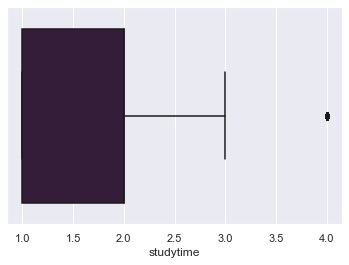

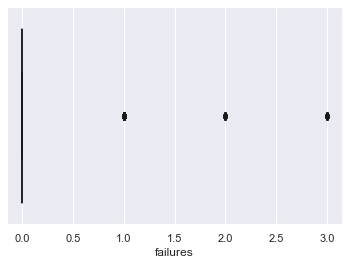

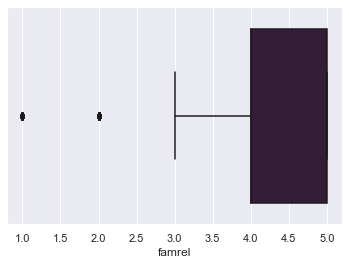

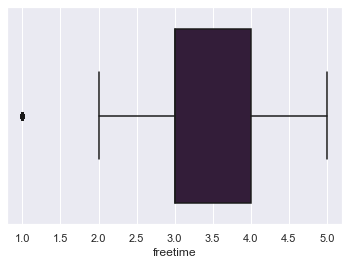

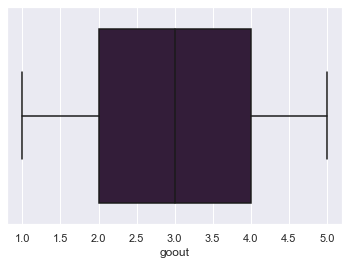

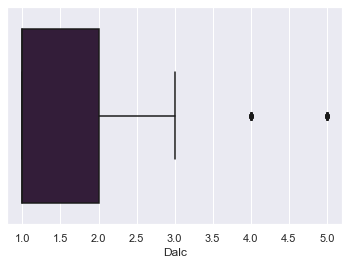

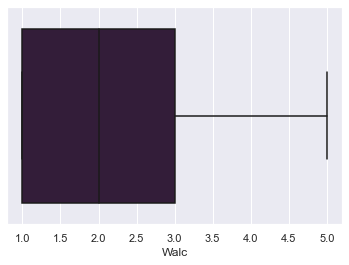

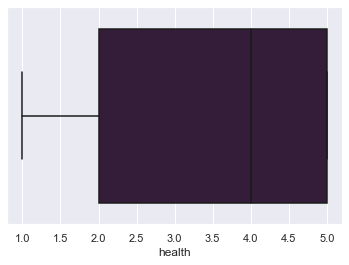

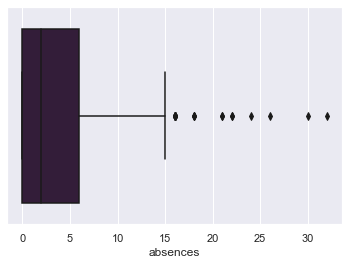

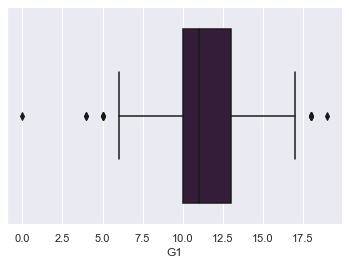

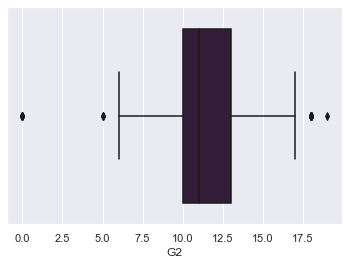

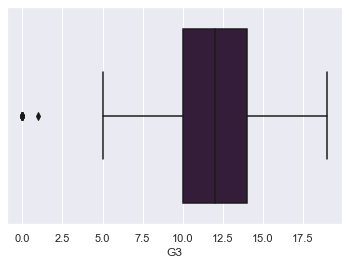

In [34]:
for i in col_2:
    ax=sns.boxplot(x=df[i])
    plt.show()

<AxesSubplot:xlabel='G1', ylabel='G2'>

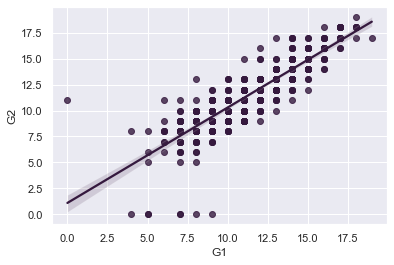

In [35]:
sns.regplot(x="G1", y="G2", data=df)

<AxesSubplot:xlabel='G2', ylabel='G3'>

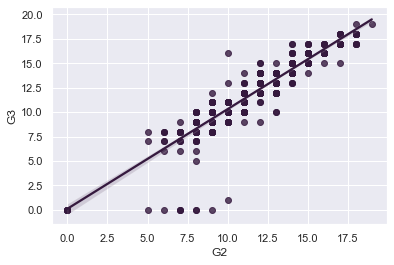

In [36]:
sns.regplot(x="G2", y="G3", data=df)

<AxesSubplot:xlabel='G1', ylabel='G3'>

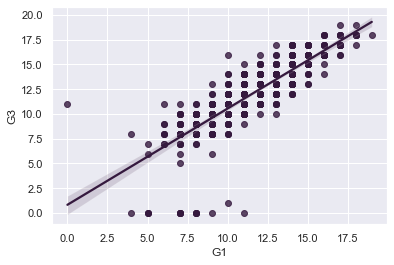

In [37]:
sns.regplot(x="G1", y="G3", data=df)

<AxesSubplot:xlabel='Dalc', ylabel='Walc'>

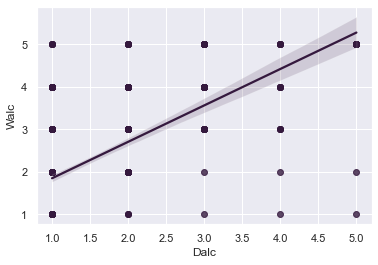

In [38]:
sns.regplot(x="Dalc",y="Walc",data=df)

<AxesSubplot:xlabel='health', ylabel='G3'>

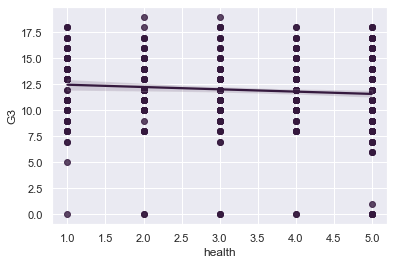

In [39]:
sns.regplot(x="health", y="G3", data=df)

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

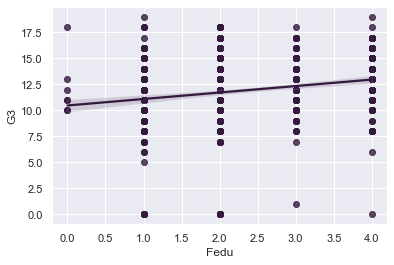

In [40]:
sns.regplot(x="Fedu", y="G3", data=df)

In [41]:
# Create an overall health column for each entry
df['Overall Health'] = (0.5 * df['Dalc'] + 0.5 * df['Walc'] + 2 * df['health'] + df['famrel']) / 4

# Overall Health vs. Grade
Overall Health vs. Grade
The relationship between these two features can be depicted using a simple regression plot.

<AxesSubplot:xlabel='Overall Health', ylabel='G3'>

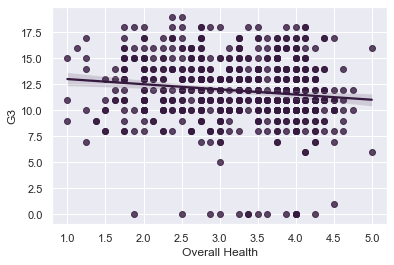

In [42]:
sns.regplot(x='Overall Health', y='G3', data=df)

 # Absences vs. Grade

[Text(0.5, 1.0, 'Absences vs G3')]

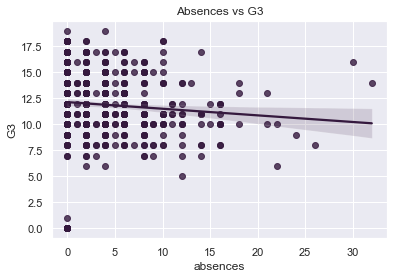

In [43]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

[Text(0.5, 1.0, 'Absences vs G1')]

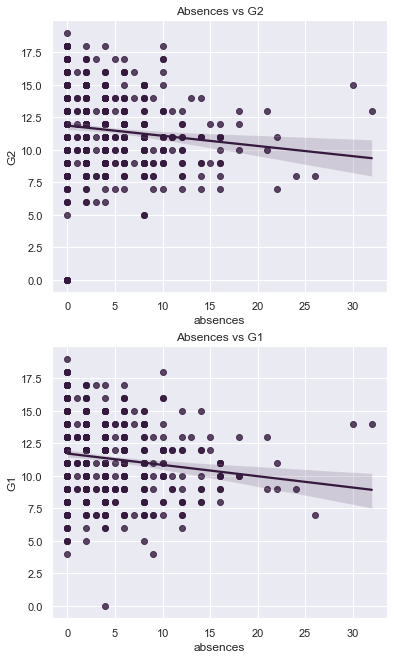

In [44]:
fig, axes = plt.subplots(2,1, figsize=(6,11))
sns.regplot(x='absences', y='G2', data=df, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=df, ax=axes[1])
axes[1].set(title='Absences vs G1')

In [45]:
# This low correlation is because absent students (usually) revise the material missed,
#effectively accounting for their absence.

In [46]:
#plot the correlation matrix to validate our hypothesis

<AxesSubplot:>

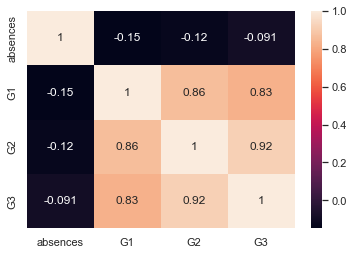

In [47]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

# Age vs. Grade

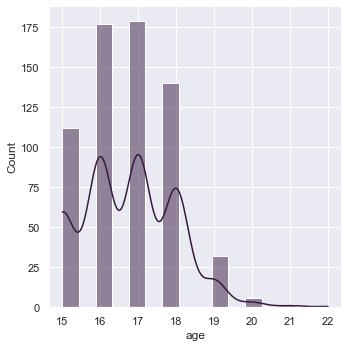

In [48]:
# Visualize distribution of `age`
sns.displot(x='age', data=df, kind='hist', kde=True)

In [49]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.758929,11.830357,12.107143
1,16,11.723164,11.638418,11.994350
2,17,11.519553,11.849162,12.268156
3,18,11.200000,11.450000,11.771429
4,19,9.031250,9.312500,9.531250
5,20,10.333333,12.000000,12.000000
6,21,9.000000,11.000000,11.000000
7,22,7.000000,8.000000,5.000000


In [50]:
# As we can see we notice when age is older the grades got decreased.

 # We will plot the grades corresponding with ages.

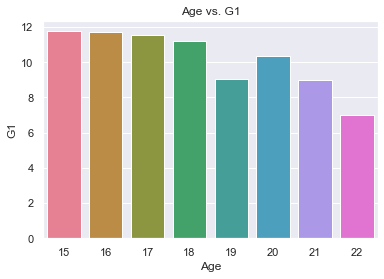

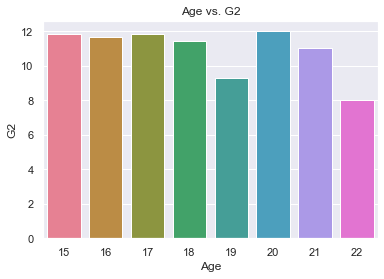

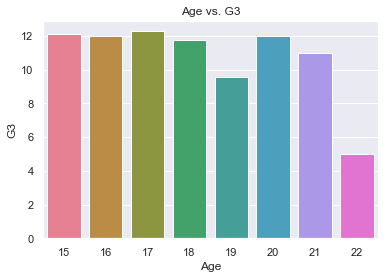

In [51]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}')
    plt.show()

In [52]:
# The older a person is, the lower the grades they receive are; however, twenty-year-olds (in this dataset)
# exhibit an outstanding performance

# Education Level vs. Job

In [53]:
mjob_edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
mjob_edu.reset_index(inplace=True)
mjob_edu.sort_values(by='Medu', ascending=False, inplace=True)

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Lvl.'),
 Text(0.5, 1.0, 'Job vs. Edu. Lvl. (Mother)')]

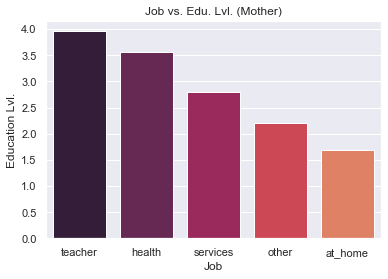

In [54]:
sns.barplot(x='Mjob', y='Medu', data=mjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)')

In [55]:
# As expected, teachers and health care professionals need to have a high education level in order
# to acquire a job in the industry,and conversely with at home mother.

# Fathers' Job and Education

In [56]:
fjob_edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
fjob_edu.reset_index(inplace=True)
fjob_edu.sort_values(by='Fedu', ascending=False, inplace=True)

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Lvl.'),
 Text(0.5, 1.0, 'Job vs. Edu. Lvl. (Father)')]

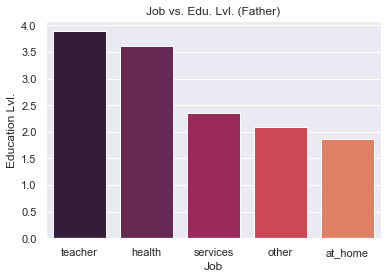

In [57]:
sns.barplot(x='Fjob', y='Fedu', data=fjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)')

# Time Productivity vs. Grade

<AxesSubplot:xlabel='Time Productivity', ylabel='G3'>

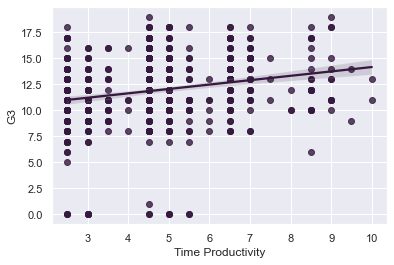

In [58]:
df['Time Productivity'] = 0.5 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x='Time Productivity', y='G3', data=df)

In [59]:
# As expected, students with a greater time productivity have better grades.

<AxesSubplot:xlabel='studytime', ylabel='G3'>

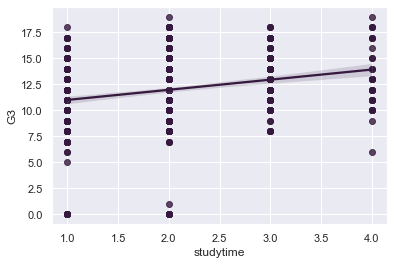

In [60]:
sns.regplot(x='studytime', y='G3', data=df)

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

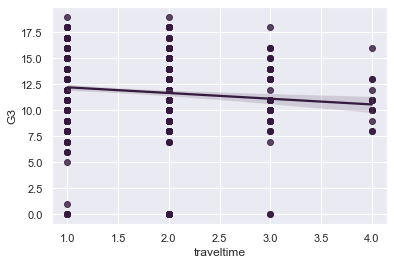

In [61]:
sns.regplot(x='traveltime', y='G3', data=df)

In [62]:
#Conclusion
#This section confirmed the obvious: students who study more receive better grades whereas
#students who travel more or study less receive lower grades.

In [63]:
# Job vs. Grade

In [64]:
mjob_gr = df.groupby("Mjob").aggregate({"G3": "mean"}).reset_index()
mjob_gr

,Mjob,G3
0,at_home,11.044444
1,health,13.062500
2,other,11.670543
3,services,12.147059
4,teacher,13.138889


[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'G3'),
 Text(0.5, 1.0, 'Job vs. Grade (Mother)')]

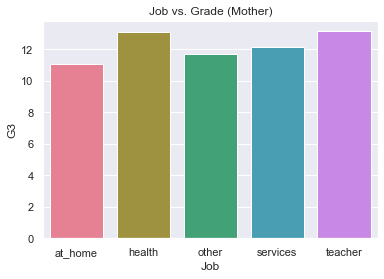

In [65]:
sns.barplot(data=mjob_gr, x='Mjob', y='G3', palette='husl').set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Mother)')

In [66]:
# Fathers' Job

In [67]:
fjob_gr = df.groupby("Fjob").aggregate({"G3": "mean"}).reset_index()
fjob_gr

,Fjob,G3
0,at_home,11.428571
1,health,12.565217
2,other,11.891008
3,services,11.629834
4,teacher,13.583333


[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'G3'),
 Text(0.5, 1.0, 'Job vs. Grade (Father)')]

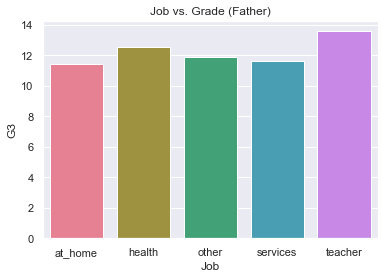

In [68]:
sns.barplot(data=fjob_gr, x='Fjob', y='G3', palette='husl').set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Father)')

In [69]:
# Family Size vs. Grade

In [70]:
size_gr = df.groupby("famsize").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
size_gr

,famsize,G1,G2,G3
0,GT3,11.315098,11.496718,11.811816
1,LE3,11.598958,11.744792,12.130208


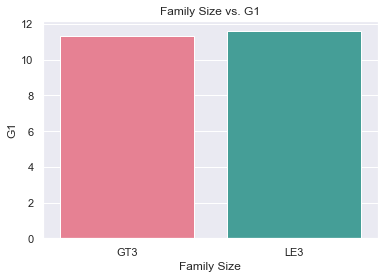

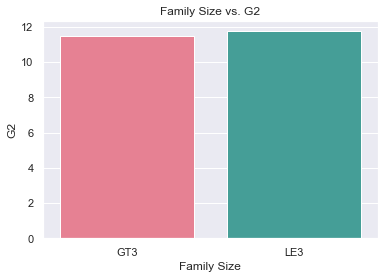

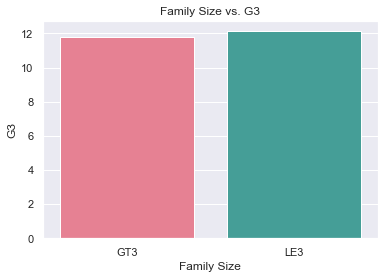

In [71]:
for grade in grades:
    sns.barplot(data=size_gr, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}')
    plt.show()

In [72]:
# As the barplots show, children with no siblings tend to score slightly 
# indeed, very slightly - higher than students with siblings

In [73]:
# Activites vs. Grade

In [74]:
act_gr = df.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,11.185629,11.380240,11.718563
1,yes,11.625397,11.771429,12.104762


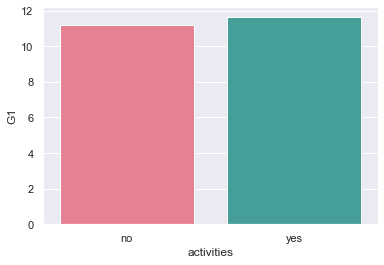

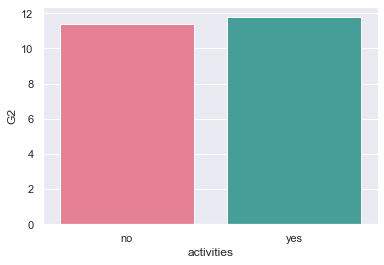

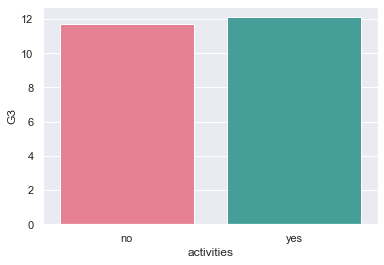

In [75]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl')
    plt.show()

In [76]:
out_gr = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,10.416667,10.437500,10.729167
1,2,12.013793,12.324138,12.668966
2,3,11.634146,11.746341,12.151220
3,4,11.255319,11.524823,11.971631
4,5,10.763636,10.800000,10.872727


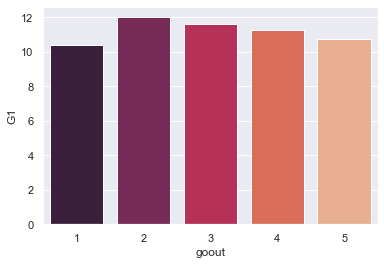

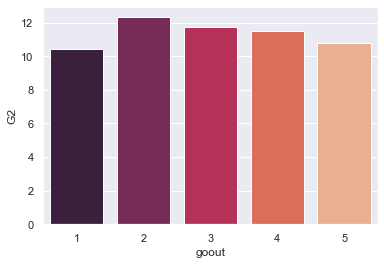

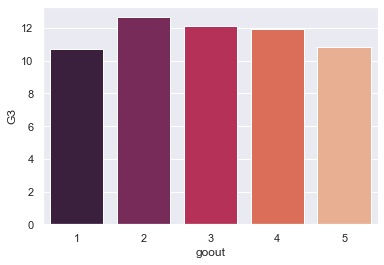

In [77]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

# Data Pre-Processing
This involves a number of activities such as:

Assigning numerical values to categorical data; Handling missing values; and Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

In [78]:
#list of columns that are categorical
cat_col = df.select_dtypes(include=['object']).columns.tolist()
#list of columns that are numerical
num_col = df.select_dtypes(include=['number']).columns.tolist()
cat_col


['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

# Label encoding
Here, I assign the 32 features to a NumPy array X and encoded the original string representation on the categorical columns into integers to start the machine learning phase

In [80]:
new_df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet',
 'romantic'])

In [81]:
 # We drop G3 column

In [82]:
X = new_df.drop('G3', axis=1).values
y = new_df['G3'].values

# spliting the data into train and test set

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((454, 60), (454,), (195, 60), (195,))

In [84]:
# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 0.9882647 ,  1.34520623,  1.58354767, ...,  0.5858287 ,
         0.75560192, -0.75560192],
       [-0.61413592,  0.45233543, -1.20661006, ...,  0.5858287 ,
         0.75560192, -0.75560192],
       [ 0.9882647 ,  1.34520623,  1.58354767, ...,  0.5858287 ,
         0.75560192, -0.75560192],
       ...,
       [-0.61413592, -0.44053537, -0.27655748, ..., -1.70698363,
         0.75560192, -0.75560192],
       [ 0.18706439, -1.33340618, -1.20661006, ..., -1.70698363,
        -1.32344821,  1.32344821],
       [ 0.18706439, -1.33340618, -1.20661006, ..., -1.70698363,
        -1.32344821,  1.32344821]])

# Training data using different models

# Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

# initializing the algorithm
lin_reg = LinearRegression(normalize=True)

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

C:\Users\Jairo\anaconda3.1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [86]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [87]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.8036836433217728
MSE: 1.4760867846162615
RMSE: 1.2149431199098424
R2 Square 0.8665158887928889
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8049994644374174
MSE: 1.5458864134881973
RMSE: 1.243336806134282
R2 Square 0.8473365757074189
__________________________________


 # SGDRegressor

In [88]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.9186427672626567
MSE: 1.7787667303383812
RMSE: 1.3337041389822486
R2 Square 0.8391442166418931
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.9615091857613002
MSE: 1.891666328417769
RMSE: 1.3753786127527827
R2 Square 0.8131892118363354
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\2238061219.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# Ridge Regression

In [89]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.836758651574555
MSE: 1.6717065880620385
RMSE: 1.2929449284722216
R2 Square 0.8488257801423614
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8265455725347399
MSE: 1.7333999486551959
RMSE: 1.316586475950287
R2 Square 0.8288187479226418
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\1501396925.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# RandomForestRegressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.789625641025641
MSE: 1.4832667333333334
RMSE: 1.2178943851308837
R2 Square 0.8658665983290763
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3130528634361233
MSE: 0.25072343171806166
RMSE: 0.5007229091204652
R2 Square 0.9752399029433875
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\1416346550.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# Support Vector Machine

In [91]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.0586194236845756
MSE: 2.301401319118698
RMSE: 1.517037019692894
R2 Square 0.7918818101922811
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010720895824572975
MSE: 1.204453799129869e-06
RMSE: 0.0010974761041270416
R2 Square 0.9999998810546236
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\1226733489.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# K Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
knn_reg.fit(X_train, y_train)

test_pred = knn_reg.predict(X_test)
train_pred = knn_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["KNeighborsClassifier", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.0586194236845756
MSE: 2.301401319118698
RMSE: 1.517037019692894
R2 Square 0.7918818101922811
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010720895824572975
MSE: 1.204453799129869e-06
RMSE: 0.0010974761041270416
R2 Square 0.9999998810546236
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\4115416614.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# ACCCURACY

In [93]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.803684,1.476087,1.214943,0.866516,0.804276
1,Stochastic Gradient Descent,0.918643,1.778767,1.333704,0.839144,0.000000
2,Ridge Regression,0.836759,1.671707,1.292945,0.848826,0.804599
3,Random Forest Regressor,0.789626,1.483267,1.217894,0.865867,0.000000
4,SVM Regressor,1.058619,2.301401,1.517037,0.791882,0.000000
5,KNeighborsClassifier,1.058619,2.301401,1.517037,0.791882,0.000000


<AxesSubplot:ylabel='Model'>

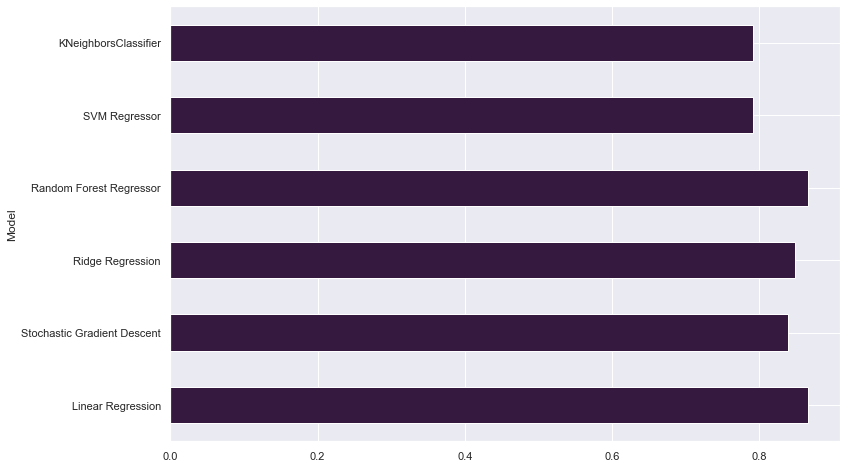

In [94]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Feature Selection

In [95]:
X = new_df.drop('G3', axis=1)
y = new_df['G3']

In [96]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [97]:
print(selection.feature_importances_)

[4.47109654e-03 2.82964538e-03 2.48855733e-03 5.38881637e-03
 2.47641980e-03 1.98988797e-02 6.46261451e-03 2.87782889e-03
 3.37826692e-03 3.69089007e-03 3.31297319e-03 3.11735307e-03
 7.45399114e-03 2.42607806e-01 5.85804158e-01 4.46411583e-03
 2.68443181e-03 2.81378817e-03 3.27694970e-03 2.23107146e-03
 2.29594978e-03 2.53999540e-03 4.26445459e-03 1.29748349e-03
 1.16915441e-03 3.70755437e-04 4.43580362e-04 8.39648873e-04
 4.83042318e-04 8.27651889e-03 1.21223059e-03 4.98298129e-03
 3.29176642e-04 4.82789044e-04 1.57051086e-03 3.23166720e-03
 8.11823669e-04 4.83137112e-03 1.80393087e-03 9.56769015e-03
 1.45578290e-03 4.14356501e-03 8.43996795e-04 6.17415906e-04
 1.57595616e-03 1.18961666e-03 3.30960230e-03 3.01267078e-03
 9.93805034e-04 1.05037676e-03 1.81202142e-03 1.73196721e-03
 1.63131627e-03 1.05433239e-03 3.80493160e-03 3.58283872e-03
 8.26315478e-04 6.56192135e-04 2.07193328e-03 2.10095389e-03]


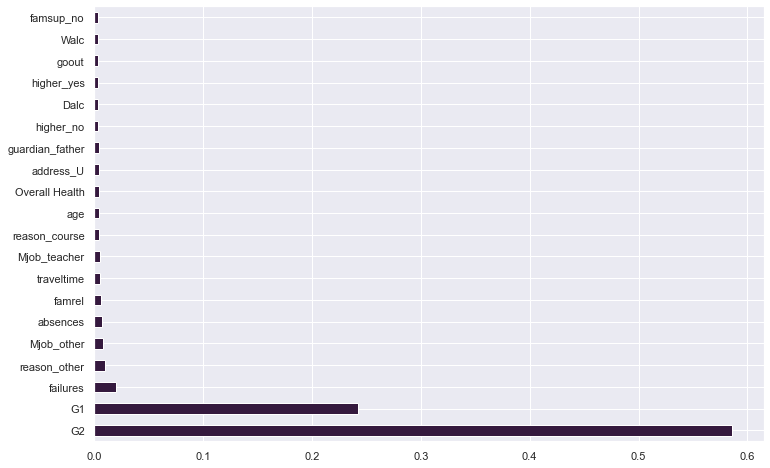

In [98]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [115]:
X = df[[ 'studytime','Medu','Fedu','G1', 'G2']]
y = df[['G3']]

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((519, 5), (519, 1), (130, 5), (130, 1))

In [117]:
from sklearn.linear_model import LinearRegression

# initializing the algorithm
lin_reg = LinearRegression(normalize=True)

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

C:\Users\Jairo\anaconda3.1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [118]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.7422502174988892
MSE: 1.3897169200968549
RMSE: 1.1788625535221886
R2 Square 0.8574900126839345
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8007432082131895
MSE: 1.636811374232936
RMSE: 1.279379292560629
R2 Square 0.844496724972275
__________________________________


In [119]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.7349116687551017
MSE: 1.389945024481106
RMSE: 1.178959297211361
R2 Square 0.8574666214792681
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.796805346501454
MSE: 1.644162821894318
RMSE: 1.28224912629891
R2 Square 0.8437983096230564
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\1501396925.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


In [120]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

C:\Users\Jairo\anaconda3.1\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set evaluation:
_____________________________________
MAE: 0.7208669851814458
MSE: 1.3910915148166043
RMSE: 1.179445426807279
R2 Square 0.8573490534186026
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.7933056661620622
MSE: 1.6675001482750245
RMSE: 1.2913172144268132
R2 Square 0.8415811752973058
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\2238061219.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


In [121]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

test_pred = rfr.predict(X_test)
train_pred = rfr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\3559343953.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


Test set evaluation:
_____________________________________
MAE: 0.9822081237992777
MSE: 2.554068397967409
RMSE: 1.598145299391582
R2 Square 0.738090362335567
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.41386752272026844
MSE: 0.45346860573428394
RMSE: 0.6734007764580346
R2 Square 0.956918766313569
__________________________________


C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\3559343953.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


In [122]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.742250,1.389717,1.178863,0.857490,0.823216
1,Ridge Regression,0.734912,1.389945,1.178959,0.857467,0.823230
2,Stochastic Gradient Descent,0.720867,1.391092,1.179445,0.857349,0.000000
3,Random Forest Regressor,0.982208,2.554068,1.598145,0.738090,0.000000


<AxesSubplot:ylabel='Model'>

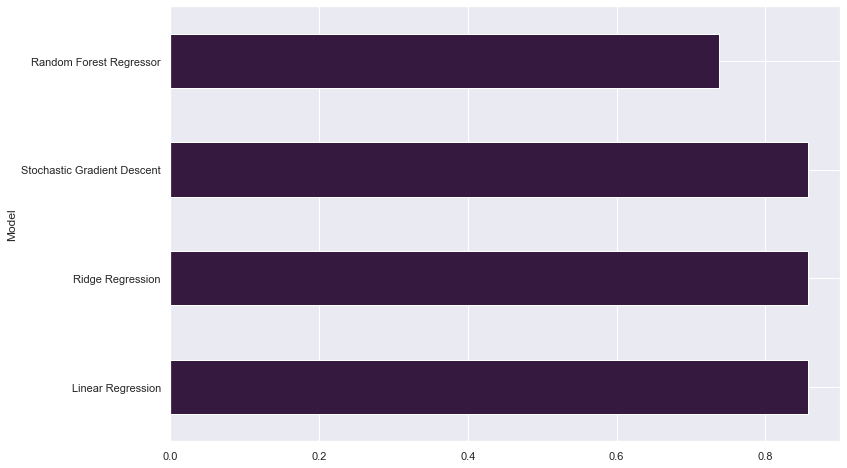

In [123]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Saving the model

In [124]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print(y_pred)

C:\Users\Jairo\AppData\Local\Temp\ipykernel_3540\3196930961.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


[17.34       13.123      17.53       11.81       12.04208333 16.3625
 17.46       10.16902381  5.9025     10.92333333 18.13       11.27166667
 12.75396825  9.64       10.79295238 13.1617381  11.955       4.325
 16.31       14.93483333 15.4        13.76188095 13.2707381  12.2895
 15.42       12.86100072  9.52       11.295      11.93578571 15.764
 16.17       13.71833333  7.86666667  6.24866667 17.82       15.5
 14.02566667 14.08571429 13.01643074 11.52133333 13.68204762 10.42166667
  3.36       12.2        12.09533333 13.05833333 18.         12.06
 12.84416667 11.09       11.535      10.6        14.6625      9.91333333
 11.81       17.89        9.68       11.68716667 11.69316667 10.08933333
 10.47166667 11.24333333 16.3625     12.74833333 15.12       15.34
 10.03233333  9.04       10.36916667 10.36666667 15.69       15.405
 12.44666667 16.161      13.31166667 12.73016667 13.11585317 15.03
 13.3875     13.22766667 11.79       12.29266667 16.4         8.02
 13.36716667 17.5        11.3505

In [125]:
import joblib

In [126]:
joblib.dump(rfr,r'C:\Users\Jairo\Desktop\Python\Student Performance Prediction System\models\rfr.sav')

['C:\\Users\\Jairo\\Desktop\\Python\\Student Performance Prediction System\\models\\rfr.sav']

In [127]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(y_pred)

[[18.57534444]
 [11.28425765]
 [18.75987626]
 [11.09866783]
 [11.80258588]
 [16.73466796]
 [17.64273007]
 [ 9.40722845]
 [10.26521052]
 [10.54995741]
 [18.93279677]
 [12.30525913]
 [12.4878641 ]
 [ 9.567263  ]
 [12.04799519]
 [13.41939296]
 [11.46773146]
 [ 7.30738786]
 [15.77861433]
 [14.48748962]
 [15.31017698]
 [13.69038504]
 [13.60392478]
 [12.47495063]
 [15.44674477]
 [13.12387613]
 [ 8.3518286 ]
 [11.42085294]
 [11.54450727]
 [15.55558628]
 [16.55013614]
 [13.31055145]
 [ 8.04361495]
 [ 7.16113562]
 [18.52629491]
 [15.52031906]
 [14.19197278]
 [14.84795431]
 [13.30840794]
 [11.30878242]
 [13.58048552]
 [10.35058528]
 [ 8.07890967]
 [11.59160245]
 [13.40970851]
 [13.38518375]
 [18.32215085]
 [11.28319965]
 [12.22869998]
 [11.60622611]
 [11.33439269]
 [11.07522857]
 [14.5268272 ]
 [ 9.99527645]
 [11.09866783]
 [18.06407224]
 [ 9.02633686]
 [11.38450022]
 [11.1988829 ]
 [ 9.50530001]
 [ 9.11171161]
 [11.33330718]
 [16.73466796]
 [12.24245479]
 [15.26006944]
 [15.53106152]
 [10.21724

In [128]:
import joblib

In [129]:
joblib.dump(lin_reg,r'C:\Users\Jairo\Desktop\Python\Student Performance Prediction System\models\lin_reg.sav')

['C:\\Users\\Jairo\\Desktop\\Python\\Student Performance Prediction System\\models\\lin_reg.sav']